## Binarization

Sometimes the count doesn't give the actual results of something might happen or not, if taking example of liking and disliking of a song, we can't say that if a person listen a song 20 times likes it 2x time than a person listens 10 times only. Maybe the later one listen it occasionally and the prior one on daily basis.

### Binarizing listen counts in the Million Song Dataset


In [2]:
import pandas as pd
listen_count = pd.read_csv("/home/garvit/Downloads/Compressed/train_triplets.txt.zip", 
                           header = None, delimiter='\t')

In [16]:
listen_count.sample(10)

,0,1,2
32950602,bf63ed6c770270506e12153661c5aae2d6e640b4,SOBICLO12A67FFB422,1
5396704,5cdc71d8629a43328efde899d17a163138573972,SOTPSEG12AB0186CB8,1
39910583,205e908c570cc3f1fda53797693b5b24fd7a7285,SOPTLQL12AB018D56F,1
38030812,344883e2ce925e65cff0d8325d4b6905b1e3d222,SONELPS12A8C14385A,6
31684151,ffa68fcb9f2f3860d9868b23fdb196ab15cc5ce7,SOCVTLJ12A6310F0FD,1
28103055,8bd92a28f5e23d04a276acea2cd62c79bf815590,SOPXTAX12A6D4F573B,1
25066164,4661129f134018e9b88c5d08c95207428ae9813b,SOUDBSW12A58A7B103,3
22049429,af703436471430e95e257b44927393b11d082aeb,SOAIVZL12A8C139DFB,2
38219482,5d621fd9ea53ed22f8d91efa2834c50f5c2946c6,SOGXGDX12AB0181AFD,1
5620696,2ce6e1a794ad57480aad740eff6384aab9f4fbb0,SOQJJVM12A6D4FAC73,1


In [17]:
listen_count[2] = 1

In [20]:
listen_count.sample(10)

,0,1,2
16098094,bf3ea0d3b9bf47fed9d6959a12b9a765c5fd02c3,SOQQRXS12AF72A186D,1
19966826,5bbae5c48fb5dce65e39ca9ec279e65f874fd61d,SOPSKCR12A6D4F8B99,1
39979627,f1734f5253ad22661434041118be57af5f562c60,SOZTZRR12A58A80C97,1
47953053,8da6dfc1af934d2741378caf8f28405a32908c2c,SOGPGBV12A6701EEE5,1
34887140,89c04b717d849cdc919cc43b75d3086e786b6f55,SOSMNLX12AF72A0DBE,1
21453241,b9c8c49115d06e9f811a74e53514fb81a85a95a7,SOIFSNB12AC468ACA6,1
9909482,20ee871eb9720889f65d4f9ee0ab3505ab9eda29,SOQIYDW12AB0187C01,1
19785709,e2165d499f740144a4d8eca17dc6da9f8ae86fc8,SOEBCQH12A8AE46E5C,1
25031954,d6a40f4da871fb4bebe4ade93867e2df3850e74b,SOVEXFH12AB0185569,1
9281401,f2bd0346f11e050ef577e3a12f30a9d8964c3ad3,SOINUJV12A8C1429E9,1


## Quantization or Binning

###  Visualizing business review counts in the Yelp dataset


In [1]:
import pandas as pd
import json

In [2]:
# load data about businesses
biz_df = pd.read_json("/home/garvit/Downloads/yelp_academic_dataset_business.json", lines=True)

In [15]:
biz_df.sample(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
124338,XL_UXD2rDSO37i4A56W_bw,Yoga Flow,250 Mt Lebanon Blvd,Pittsburgh,PA,15234,40.367990,-80.036804,5.0,8,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Yoga, Fitness & Instruction",None
70665,ePPpo0BL1J_59RQHI3HRVw,Hawthorn Suites By Wyndham Champaign,101 Trade Centre Dr,Champaign,IL,61820,40.096773,-88.246042,3.0,33,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Event Planning & Services, Hotels & Travel, Ho...",None
129553,c_01eTIw96_dKmIT_5vUIg,Bella Vista Window Cleaning,11825 N 90th Way,Scottsdale,AZ,85260,33.594439,-111.885536,5.0,10,1,"{'BusinessAcceptsCreditCards': 'False', 'ByApp...","Window Washing, Home Services","{'Monday': '8:0-17:30', 'Tuesday': '8:0-17:30'..."
38340,73xZEq9IPdAhLOzDGsFBqA,Christine's Hot Rod Hair,3772 Clague Rd,North Olmsted,OH,44070,41.433591,-81.880582,5.0,3,1,{'GoodForKids': 'True'},"Hair Salons, Barbers, Beauty & Spas",None


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

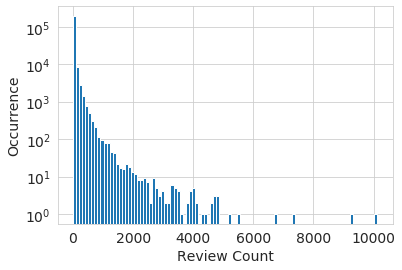

In [18]:
# Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### Fixed-width binning


Quantizing counts with fixed-width bins


In [19]:
import numpy as np

In [20]:
# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
print(small_counts)

# Map to evenly spaced bins 0-9 by division
divisor = 10
np.floor_divide(small_counts, divisor)

[94 60 52 92 51 10  0 59 25 76 98 30 48 23 50 31 88 73 22 45]


array([9, 6, 5, 9, 5, 1, 0, 5, 2, 7, 9, 3, 4, 2, 5, 3, 8, 7, 2, 4])

In [21]:
# An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897,44, 28, 7971, 926, 122, 22222]

# Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Quantile binning


Computing deciles of Yelp business review counts


In [22]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    14.0
0.7    21.0
0.8    36.0
0.9    77.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

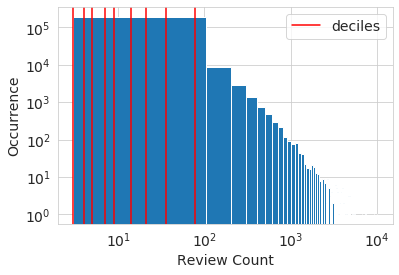

In [23]:
# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)


 Binning counts by quantiles


In [24]:
# Continue example 2-3 with large_counts
import pandas as pd

In [25]:
# Map the counts to quartiles
pd.qcut(x=large_counts, q=4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])